# Web Scrapping Project 2 
## Asma Akhtar
### https://fbref.com/en/squads/00f74a56/Liverpool-Women-Stats

# The project will be to obtain player information from a webpage (e.g., player names, ages, and pass completion percentages),  to view the data for analysis and visualization.



### 1. What is the average age of the player?
#### standard stats table from team site "age" column

### 2. Compare performance between Home vs. Away.
#### Women's Super League Table " Home/Away" table, home_wins vs home_games

### 3. Which player has the highest pass completion?
#### passing table teams website "CMP%" column 

### 4. Which player has played the greatest number of games?
#### playing time table from player hyperlinks, MP column

In [174]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time

In [176]:
# function to get webpage data
def get_web_page(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        return response.text
    else:
        print(f"Oops! Received status code {status}")
        return ""

# Scrape data from one page and store in a DataFrame

In [179]:
url='https://fbref.com/en/squads/00f74a56/Liverpool-Women-Stats'
# Call the function to get the page content
page= get_web_page(url)
# Create a BeautifulSoup object to parse HTML content.
soup=bs(page)

In [181]:
#Print the prettified HTML content
print(soup.prettify())
#Print the type of soup object
type(soup)

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202411012" rel="dns-prefetch"/>
  <script>
   /* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */
  window.dataLayer = window.dataLayer ||[];
      function gtag(){dataLayer.push(arguments);}
      gtag('consent','default',{
        'ad_storage':'denied',
        'analytics_storage':'denied',
        'ad_user_data':'denied',
        'ad_personalization':'denied',
        'personalization_storage':'denied',
        'functionality_storage':'granted',
        'security_storage':'granted',
        'wait_for_update': 500
      });
      gtag("set", "ads_data_redaction", true);
  </script>
  <script src="https://cmp.osano.com/16CGnCU

bs4.BeautifulSoup

In [183]:
# Find the table with class 'stats_table' and get its tbody section
stats_table = soup.find(class_='stats_table').tbody
# Print the tbody content of the stats table
print(stats_table)


<tbody> <tr><th class="left" csk="Laws Rachael" data-append-csv="7b45e2ca" data-stat="player" scope="row"><a href="/en/players/7b45e2ca/Rachael-Laws">Rachael Laws</a></th><td class="left poptip" data-stat="nationality" data-tip="birth"><a href="/en/country/ENG/England-Football"><span style="white-space: nowrap"><span class="f-i f-gb-eng" style="">eng</span> ENG</span></a></td><td class="center" csk="1.0" data-stat="position">GK</td><td class="center" data-stat="age">34-003</td><td class="right group_start" data-stat="games">6</td><td class="right" data-stat="games_starts">6</td><td class="right" csk="540" data-stat="minutes">540</td><td class="right" data-stat="minutes_90s">6.0</td><td class="right iz group_start" data-stat="goals">0</td><td class="right iz" data-stat="assists">0</td><td class="right iz" data-stat="goals_assists">0</td><td class="right iz" data-stat="goals_pens">0</td><td class="right iz" data-stat="pens_made">0</td><td class="right iz" data-stat="pens_att">0</td><td c

# Question 1: What is the average age of the players?
## standard stats table from team site "age" column

In [186]:
#creating a function to find player information 
def get_players(soup):
    player_list = [ ] #creating an empty list to store player data
    stats_table = soup.find(class_='stats_table').tbody   # # Locate the stats table and get the tbody section
    for row in stats_table.find_all('tr'): # # Loop through each row in the tbody to take out player details
        player = row.find(attrs={'data-stat':'player','scope':'row'}).text  # Take out the player's name from the 'player' column
        age= row.find(attrs={'data-stat':'age'}).text #Take out the player's age from the 'age' column
        player_list.append({'player':player,'age':age,}) # Append the player information to the list as a dictionary
    return(player_list) # # Return the list of players with their own ages

In [188]:
# calling the function to get the player information and convert it into a DataFrame
player_df = pd.DataFrame(get_players(soup))
#print the dataframe of the players
player_df

,player,age
0,Rachael Laws,34-003
1,Gemma Bonner,33-118
2,Marie Höbinger,23-130
3,Fūka Nagano,25-244
4,Taylor Hinds,25-044
5,Olivia Smith,20-095
6,Jasmine Matthews,31-229
7,Lucy Parry,20-185
8,Jenna Clark,23-040
9,Sophie Román Haug,25-157


In [190]:
# Split age column to display the information that is before the hyphen 
player_df['age']=player_df['age'].str.split('-').str[0]
#Display the update dataframe
player_df


,player,age
0,Rachael Laws,34
1,Gemma Bonner,33
2,Marie Höbinger,23
3,Fūka Nagano,25
4,Taylor Hinds,25
5,Olivia Smith,20
6,Jasmine Matthews,31
7,Lucy Parry,20
8,Jenna Clark,23
9,Sophie Román Haug,25


In [263]:
player_df=player_df.dropna(subset=['age'])
player_df['age']=player_df['age'].astype('Int64')
player_df

,player,age
0,Rachael Laws,34
1,Gemma Bonner,33
2,Marie Höbinger,23
3,Fūka Nagano,25
4,Taylor Hinds,25
5,Olivia Smith,20
6,Jasmine Matthews,31
7,Lucy Parry,20
8,Jenna Clark,23
9,Sophie Román Haug,25


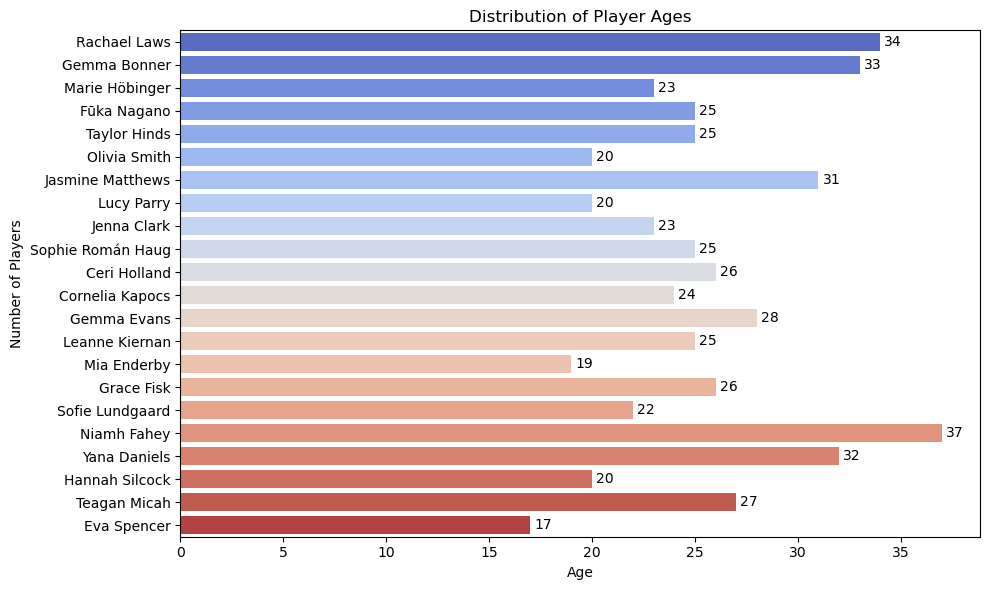

In [265]:
# Source ChatGPT helped to make the graph 
import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("coolwarm", n_colors=len(player_df))
# create a plot to see the age demographics of each player
plt.figure(figsize=(10, 6))

# Plotting a bar plot to show the player ages
ax=sns.barplot(x='age',y='player',data=player_df, hue='player', palette=palette, legend=False)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Distribution of Player Ages')

for p in ax.patches:
    ax.text(p.get_width() + 0.2, p.get_y() + p.get_height() / 2,
            f'{p.get_width():.0f}', 
            ha='left', va='center', color='black', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

In [260]:
# convert age column to numeric
player_df['age']=pd.to_numeric(player_df['age'])


In [198]:
#Calculate the average age of players
avg_age=player_df['age'].mean()
#Print average age
avg_age

25.545454545454547

# Answer: The average age of the players is 25.5.

# Question 2. Compare performance between Home vs. Away for the years 2024-2025. 
## Women's Super League Table " Home/Away" table, home_wins vs home_games

In [202]:
#Create a function to get performance results for the players.
def get_performance(soup):
    performance_list = [ ] #Creating an empyty list to store performance list 
    #stats_table = soup.find(class_='stats_table').tbody
    performance_table = soup.find(id='results2024-20251891_home_away',class_='stats_table').tbody # Locate the performance table using the ID and class
    # Loop through each row in the performance table
    for row in performance_table.find_all('tr'):
        if "Liverpool" in row.text:  
            #Take out data for home and away games 
            home_played = int(row.find(attrs={'data-stat':'home_games'}).text)
            home_won= int(row.find(attrs={'data-stat':'home_wins'}).text)
            away_played = int(row.find(attrs={'data-stat':'away_games'}).text)
            away_won= int(row.find(attrs={'data-stat':'away_wins'}).text)
            
            #calculating PERCENTAGES OF HOME VS AWAY WIN RATIOS
            home_win_percent=round(home_won/home_played*100,1)
            away_win_percent=round(away_won/away_played*100,1) 
            # Append the performance data as a dictionary to the list
            performance_list.append({'home_played': home_played,'home_won':home_won,
                                     'away_played': away_played,'away_won':away_won,
                                     'home_win_percent': home_win_percent, 'away_win_percent':away_win_percent })
            break # Exit the loop after finding Liverpool's data
    # Return the list with performance data          
    return(performance_list)

In [204]:
#Calling the function to get the performance data and convert it into a DataFrame
performance_df = pd.DataFrame(get_performance(soup))
#Display the dataframe
performance_df

,home_played,home_won,away_played,away_won,home_win_percent,away_win_percent
0,3,0,3,2,0.0,66.7


# Answer: Liverpool has the highest win percenteage vs the for away games.


# Question 3. Which player has the highest pass completion for the year 2024-2025?
## passing table teams website "CMP%" column 

In [243]:
#Create a function to find pass completion percentage 
def get_passes(soup):
    pass_list = [ ] # Creating an empty list to store pass completion percentage list
    passing_table = soup.find(id="stats_passing_189",class_='stats_table').tbody
    for row in passing_table.find_all('tr'): #Create a loop to go over the passing table in each row 
        player = row.find(attrs={'data-stat':'player','scope':'row'}).text
        cmp_percent= row.find(attrs={'data-stat':'passes_pct'}).text
        #Append the player and their pass completion percentage to the list
        pass_list.append({'player':player,'pass_completion_percent':cmp_percent})
    #Return the list of pass completion percentages
    return(pass_list)

In [245]:
#Calling the function to get the pass completion percentage data and convert it into a DataFrame
pass_df = pd.DataFrame(get_passes(soup))
# Display the DataFrame
pass_df

,player,pass_completion_percent
0,Rachael Laws,72.3
1,Gemma Bonner,79.5
2,Marie Höbinger,66.7
3,Fūka Nagano,86.0
4,Taylor Hinds,71.4
5,Olivia Smith,67.1
6,Jasmine Matthews,80.6
7,Lucy Parry,73.3
8,Jenna Clark,78.3
9,Sophie Román Haug,53.9


In [247]:
# Sort the DataFrame by pass completion percentage in descending order
top_passes=pass_df.sort_values(by='pass_completion_percent',ascending=False)
# Display the top 5 players with the highest pass completion percentages
top_passes[:5]

,player,pass_completion_percent
3,Fūka Nagano,86.0
15,Grace Fisk,85.7
12,Gemma Evans,81.2
6,Jasmine Matthews,80.6
1,Gemma Bonner,79.5


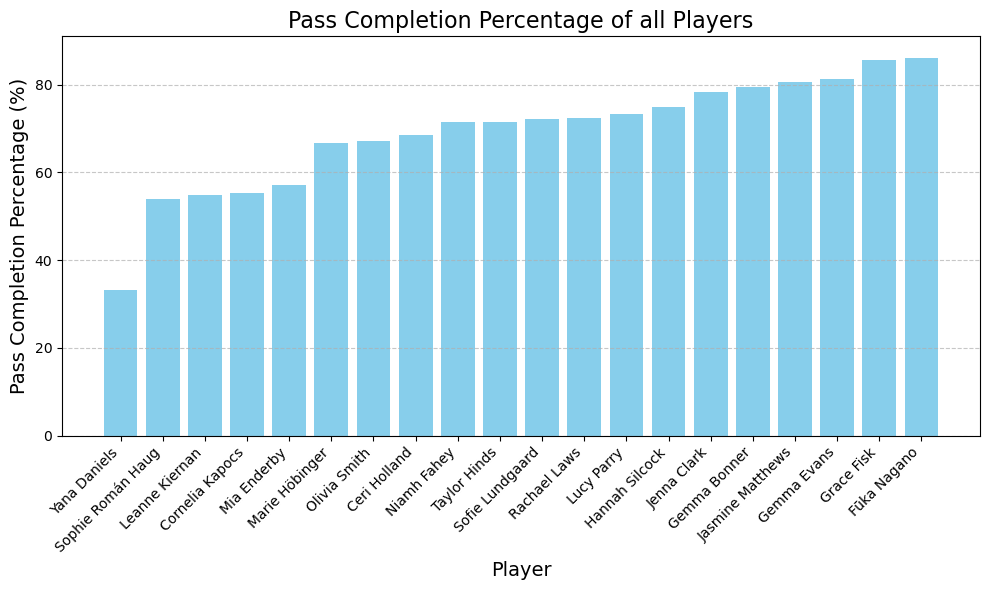

In [253]:
# Source Chatgpt was used to help with graphing
import matplotlib.pyplot as plt

# Ensure that the 'pass_completion_percent' column is numeric
top_passes['pass_completion_percent'] = pd.to_numeric(top_passes['pass_completion_percent'], errors='coerce')

# Assuming top_passes contains the top 5 players sorted by pass completion percentage
# top_passes = pass_df.sort_values(by='pass_completion_percent', ascending=False).head(5)

# Create the bar plot
plt.figure(figsize=(10, 6))

# Sort the DataFrame by 'pass_completion_percent' in ascending order
top_5_passes_sorted = top_passes.sort_values(by='pass_completion_percent', ascending=True)

# Plot the bars
plt.bar(top_5_passes_sorted['player'], top_5_passes_sorted['pass_completion_percent'], color='skyblue')

# Customize the plot
plt.title('Pass Completion Percentage of all Players', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Pass Completion Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Manually set the y-axis limits to ensure it starts at 0 and goes above the max value
max_value = top_5_passes_sorted['pass_completion_percent'].max()  # Get the maximum value

# Ensure max_value is numeric
max_value = float(max_value)  # Force conversion to float (if it's not already)

# Add a small margin above the max value for clarity
plt.ylim(0, max_value + 5)  # Add a margin above the max value

# Add gridlines to the plot for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # Gridlines on the y-axis, dashed lines, and transparency

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()



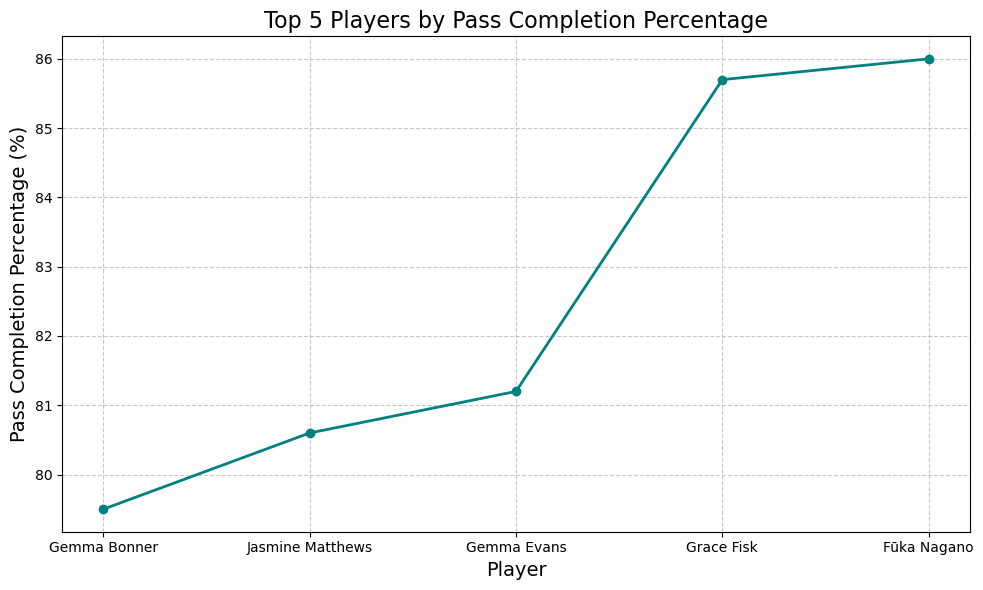

In [241]:
# Source Chatgpt was used to help with graphing
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame with the data provided
data = {
    'player': ['Fūka Nagano', 'Grace Fisk', 'Gemma Evans', 'Jasmine Matthews', 'Gemma Bonner'],
    'pass_completion_percent': [86.0, 85.7, 81.2, 80.6, 79.5]
}

# Convert the data into a pandas DataFrame
top_passes = pd.DataFrame(data)

# Sort the DataFrame by 'pass_completion_percent' in ascending order
top_5_passes_sorted = top_passes.sort_values(by='pass_completion_percent', ascending=True)

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(top_5_passes_sorted['player'], top_5_passes_sorted['pass_completion_percent'], marker='o', color='teal', linestyle='-', linewidth=2)

# Customize the plot
plt.title('Top 5 Players by Pass Completion Percentage', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Pass Completion Percentage (%)', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()


### Answer: """Fuka Nagano, Grace Fisk, Gemma Evans, Jasmine Mattews, and Gemma Bonner has the highest pass completion percentage."""

# Question 4. Which player has the highest matches played in 2024-2025?
## playing time table from player hyperlinks, MP column

In [300]:
# Source chatgpt was used to debug the error
import time
def get_matches(soup):
    matches_list = [ ]

    player_name=soup.find('div',id="meta").find('h1')
    player=player_name.find('span').text.strip()
    matches_table = soup.find(id="stats_playing_time_dom_lg", class_='stats_table')
    if matches_table:
        for row in matches_table.find_all('tr'):
            season= 'N/A'
            games= 'N/A'
            season_element = row.find(attrs={'data-stat': 'year_id'})
            if season_element:
                season = season_element.text.strip()


        # Try to extract games data, if it's available
            games_element = row.find(attrs={'data-stat': 'games'})
            if games_element:
                games = games_element.text.strip()

        # If both season and games are found, append to the list
            if season != 'N/A' and games != 'N/A':
                matches_list.append({'player':player,'season':season,'games':games})
    else: 
        print(f"No Matches table found for {player}")
        
    time.sleep(5)
    return(matches_list)

In [302]:
## Base URL for fbref
url_base='https://fbref.com/'
url_list=[]  #  Initialize an empty list to store player URLs
for row in stats_table.find_all('tr'):
    player_url=url_base+row.find(attrs={'data-stat':'player'}).a['href'] # Find the link for the player
    url_list.append(player_url) # Append the URL to the url_list
# Display the list of player URLs
url_list 

['https://fbref.com//en/players/7b45e2ca/Rachael-Laws',
 'https://fbref.com//en/players/488a84df/Gemma-Bonner',
 'https://fbref.com//en/players/153d4f38/Marie-Hobinger',
 'https://fbref.com//en/players/8c7bc9dc/Fuka-Nagano',
 'https://fbref.com//en/players/a760a666/Taylor-Hinds',
 'https://fbref.com//en/players/7cfea8d9/Olivia-Smith',
 'https://fbref.com//en/players/208e9d61/Jasmine-Matthews',
 'https://fbref.com//en/players/1778215c/Lucy-Parry',
 'https://fbref.com//en/players/1a993b0e/Jenna-Clark',
 'https://fbref.com//en/players/b8ba46ef/Sophie-Roman-Haug',
 'https://fbref.com//en/players/7a9c5b5c/Ceri-Holland',
 'https://fbref.com//en/players/f2cc3330/Cornelia-Kapocs',
 'https://fbref.com//en/players/58e461be/Gemma-Evans',
 'https://fbref.com//en/players/be519a1d/Leanne-Kiernan',
 'https://fbref.com//en/players/29ef9b4c/Mia-Enderby',
 'https://fbref.com//en/players/3978f8a9/Grace-Fisk',
 'https://fbref.com//en/players/c6bb8a64/Sofie-Lundgaard',
 'https://fbref.com//en/players/cb226

In [305]:
#create empty dataframe Create an empty DataFrame to store all player match data
matches_df=pd.DataFrame([])
for player in url_list:   # Loop through each player URL in the url_list
    page=get_web_page(player)   # Get the HTML page for the player
    soup=bs(page)   # Parse the page with BeautifulSoup
    player_matches = get_matches(soup)  # Get matches data for the player using the get_matches function
    if player_matches:  # Only concatenate if we have data in the dataframe
        matches_df = pd.concat([matches_df, pd.DataFrame(player_matches)], ignore_index=True)
time.sleep(5)  # Put a pause in between requests to prevent the server from becoming overloaded.

# Display the final matches DataFrame
matches_df

No Matches table found for Maddy Duffy
No Matches table found for Eva Spencer


,player,season,games
0,Rachael Laws,Season,MP
1,Rachael Laws,2017-2018,15
2,Rachael Laws,2018-2019,0
3,Rachael Laws,2019-2020,5
4,Rachael Laws,,
...,...,...,...
143,Teagan Micah,2021,7
144,Teagan Micah,2022,21
145,Teagan Micah,2023,5
146,Teagan Micah,2023-2024,7


# Answer: According to this table it shows that Teagan Micah has played the most matches. 